In [55]:
import matplotlib.pyplot as plt
import numpy as np

In [56]:
def getPercentages(data):
    total = sum(data.values())
    for key in data.keys():
        data[key] = round((data[key] / total) * 100, 2)
    return data

In [57]:
def plotBiasPrediction(left, center, right, dataset):
    categories = ['Left', 'Center', 'Right']
    labels = ['left', 'center', 'right', 'uncertain']
    colors = {
        'left': 'royalblue',
        'center': 'orangered',
        'right': 'lightgrey',
        'uncertain': 'gold'
    }

    data = [left, center, right]
    x = np.arange(len(categories))
    width = 0.2

    fig, ax = plt.subplots(figsize=(8, 5))
    
    for i, label in enumerate(labels):
        values = [d[label] for d in data]
        ax.bar(x + (i - 1.5) * width, values, width,
               label=label.capitalize(), 
               color=colors[label], 
               edgecolor=colors[label])

        # Add text annotations
        for xi, yi in zip(x + (i - 1.5) * width, values):
            ax.text(xi, yi + 1, f'{yi}', ha='center', va='bottom', fontsize=8)

    ax.set_ylabel('')
    ax.set_ylim(0, 100)
    ax.set_xticks(x)
    ax.set_xticklabels(categories)
    ax.set_xlabel('Ground Truth Label')
    ax.set_title('Political Bias Prediction on FlipBias using '+dataset)
    ax.legend()
    ax.grid(axis='y', linestyle='--', linewidth=0.5)

    plt.tight_layout()
    plt.show()


def calculateAccuracy(df, model):
    count = 0
    total = 0

    for i in range(len(df)):
        if df['correct'][i] == df[model][i]:
            count += 1
        total += 1
    
    return count/total

# Deepseek
## Bias Detection 

{'left': 43.13, 'right': 36.58, 'center': 19.63, 'uncertain': 0.65}
{'center': 28.08, 'left': 31.08, 'right': 39.44, 'uncertain': 1.39}
{'right': 61.79, 'left': 20.14, 'center': 17.22, 'uncertain': 0.84}


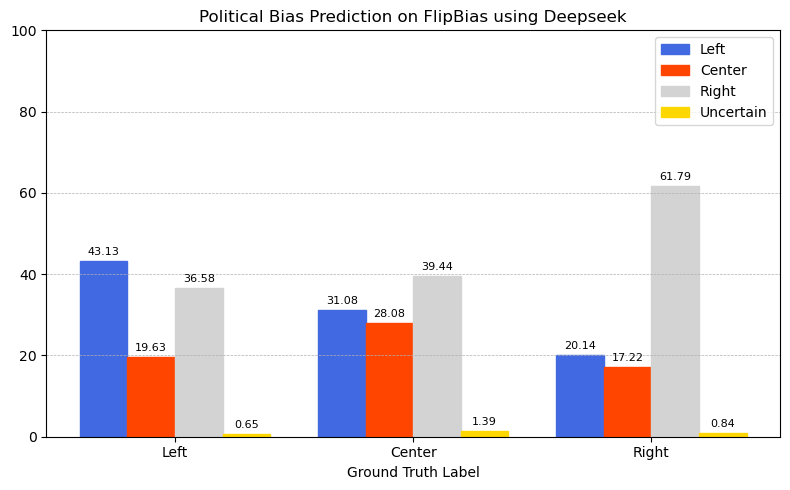

In [58]:
ds_left = {'left': 659, 'right': 559, 'center': 300, 'uncertain': 10}
ds_center = {'center': 262, 'left': 290, 'right': 368, 'uncertain': 13}
ds_right = {'right': 951, 'left': 310, 'center': 265, 'uncertain': 13}

ds_left = getPercentages(ds_left)
ds_center = getPercentages(ds_center)
ds_right = getPercentages(ds_right)

print(ds_left)
print(ds_center)
print(ds_right)

plotBiasPrediction(ds_left, ds_center, ds_right, "Deepseek")

## Comparing with Debiased Models (Prompt Fine-tuning)

In [59]:
import pandas as pd

In [60]:
def getCounts(model, bias_type, df):
    counts = df[df['correct'] == bias_type][model].value_counts()
    ble_ds = {}
    ble_ds['left'] = counts.get('left', 0)
    ble_ds['right'] = counts.get('right', 0)
    ble_ds['center'] = counts.get('center', 0)
    ble_ds['uncertain'] = counts.get('uncertain', 0)
    return ble_ds

def displayStats(model_name, df):
    left = getPercentages(getCounts(model_name, 'left', df))
    right = getPercentages(getCounts(model_name, 'right', df))
    center = getPercentages(getCounts(model_name, 'center', df))

    ble_accuracy = calculateAccuracy(df, model_name)
    print(ble_accuracy)
    plotBiasPrediction(left, center, right, model_name)

    return int(ble_accuracy)

## Base

0.47701149425287354


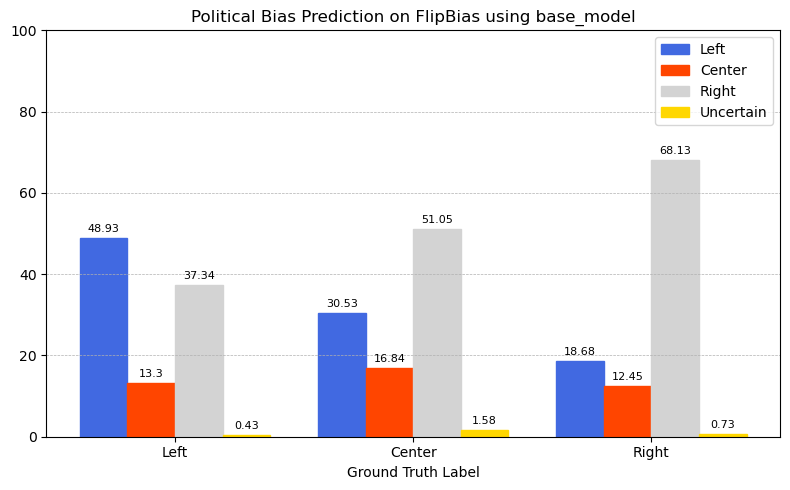

In [61]:
file = "prompt-debiased-deepseek.csv"
debiased_deepseek_df = pd.read_csv(file)

base_accuracy = displayStats('base_model', debiased_deepseek_df)
base_accuracy = base_accuracy - 0.2

### Bias Label Explanation

0.4353448275862069


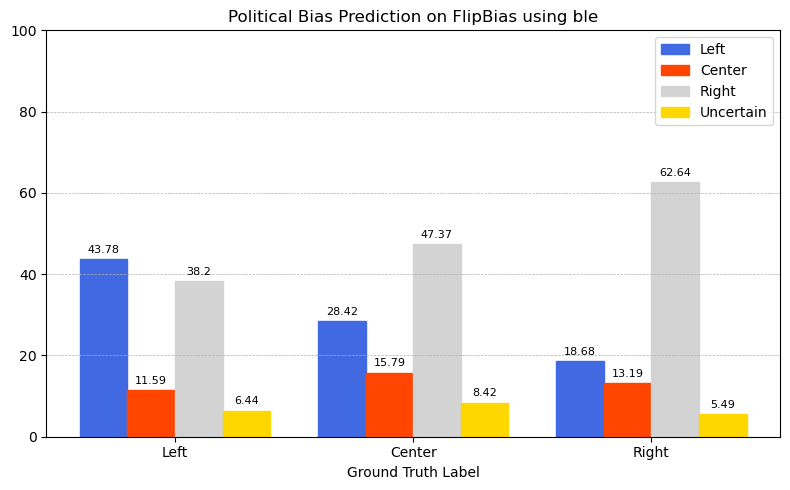

In [62]:
ble_accuracy = displayStats('ble', debiased_deepseek_df)

### Few shot prompting
#### 3 Shot

0.4640804597701149


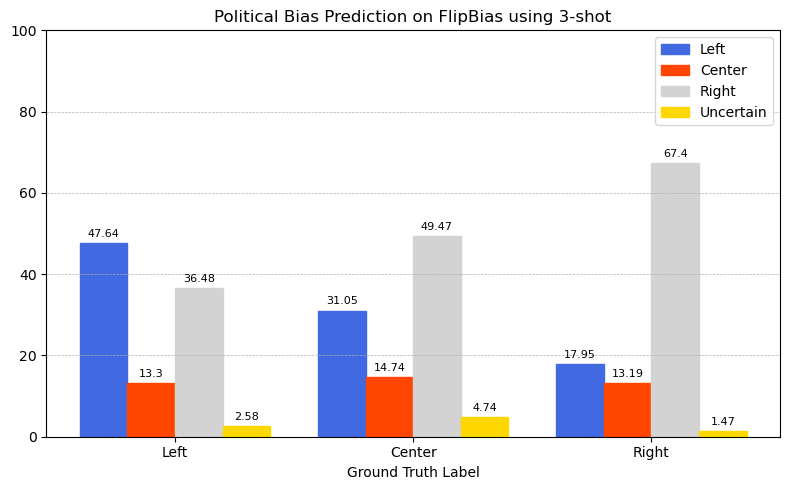

In [63]:
shot3_accuracy = displayStats('3-shot', debiased_deepseek_df)

#### 6 Shot

0.47701149425287354


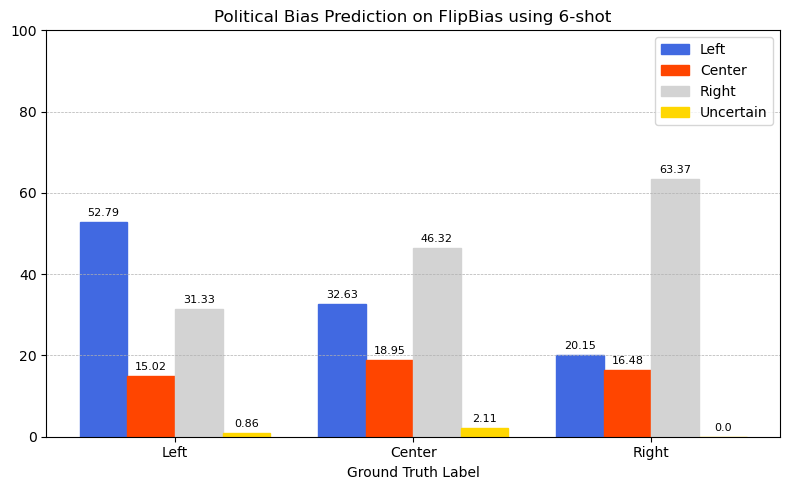

In [64]:
shot6_accuracy = displayStats('6-shot', debiased_deepseek_df)

#### 12 Shot

0.47844827586206895


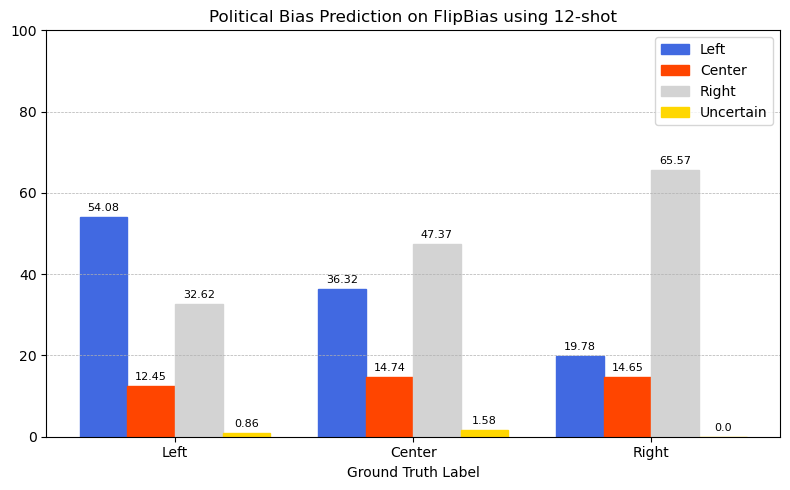

In [65]:
shot12_accuracy = displayStats('12-shot', debiased_deepseek_df)

### DS

0.4540229885057471


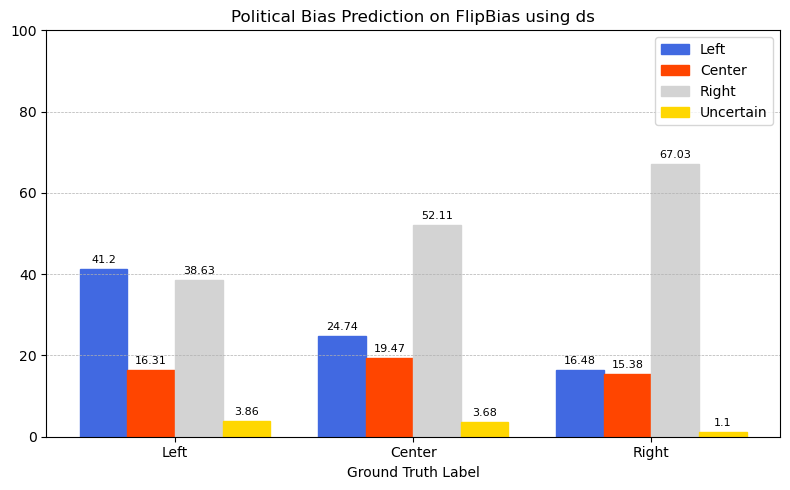

In [66]:
ds_accuracy = displayStats('ds', debiased_deepseek_df)

In [67]:
deepseek_accuracies = [base_accuracy, ble_accuracy, shot3_accuracy, shot6_accuracy, shot12_accuracy, ds_accuracy]


# Gemini
## Bias Detection - Method 1

In [68]:
gright1 = {'right': 223, 'left': 48, 'center': 285, 'uncertain': 0}	
gcenter1 = {'center': 292, 'left': 49, 'right': 23, 'uncertain': 1}
gleft1 =  {'left': 213, 'center': 274, 'right': 17, 'uncertain': 1}

gright2 = {'center': 343, 'right': 173, 'left': 28, 'uncertain': 4}	 
gcenter2 = {'center': 271, 'right': 23, 'left': 23, 'uncertain': 1}
gleft2 = {'center': 415, 'right': 23, 'left': 135, 'uncertain': 2}

gright3 = {'center': 316, 'right': 165, 'left': 17, 'uncertain': 0}	 
gcenter3 = {'center': 239, 'left': 12, 'right': 17, 'uncertain': 1}
gleft3 = {'right': 43, 'center': 400, 'uncertain': 1, 'left': 64}

grights = [gright1, gright2, gright3]
gcenters = [gcenter1, gcenter2, gcenter3]
glefts = [gleft1, gleft2, gleft3]

g_right = {'right': 0, 'left': 0, 'center': 0, 'uncertain': 0}
g_center = {'right': 0, 'left': 0, 'center': 0, 'uncertain': 0}
g_left = {'right': 0, 'left': 0, 'center': 0, 'uncertain': 0}
for i in range(3):
    g_right = {k: g_right[k] + grights[i][k] for k in g_right}
    g_center = {k: g_center[k] + gcenters[i][k] for k in g_center}
    g_left = {k: g_left[k] + glefts[i][k] for k in g_left}
g_right = getPercentages(g_right)
g_center = getPercentages(g_center)
g_left = getPercentages(g_left)
print(g_right)
print(g_center)
print(g_left)
plotBiasPrediction(g_left, g_center, g_right)

{'right': 35.02, 'left': 5.81, 'center': 58.93, 'uncertain': 0.25}
{'right': 6.62, 'left': 8.82, 'center': 84.24, 'uncertain': 0.32}
{'right': 5.23, 'left': 25.94, 'center': 68.58, 'uncertain': 0.25}


TypeError: plotBiasPrediction() missing 1 required positional argument: 'dataset'

In [ ]:
file = "prompt-debiased-gemini.csv"
debiased_deepseek_df = pd.read_csv(file)

base_accuracy = displayStats('base_model', debiased_deepseek_df)

In [ ]:
ble_accuracy = displayStats('ble', debiased_deepseek_df)

In [ ]:
shot3_accuracy = displayStats('3-shot', debiased_deepseek_df)

In [ ]:
shot6_accuracy = displayStats('6-shot', debiased_deepseek_df)

In [ ]:
shot12_accuracy = displayStats('12-shot', debiased_deepseek_df)

In [ ]:
ds_accuracy = displayStats('ds', debiased_deepseek_df)

In [ ]:
gemini_accuracies = [base_accuracy, ble_accuracy, shot3_accuracy, shot6_accuracy, shot12_accuracy, ds_accuracy]
